**Tamed Euler Method for SDEs**

This notebook demonstrates the Tamed Euler method, a stabilized numerical scheme for stochastic differential equations (SDEs), particularly useful when the drift term is non-linear or unbounded.
Here, the drift term is zero, so the method reduces to the explicit Euler scheme. This simulation highlights how robust stochastic discretization is implemented, ultimately supporting volatility modeling, derivative pricing, and risk simulations.

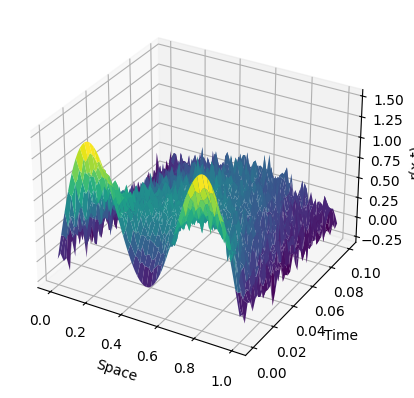

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Tamed Euler Method for SDEs
# --------------------------
# Numerically solve a stochastic differential equation using the Tamed Euler method.
# The Tamed Euler method stabilizes the simulation when drift terms are non-linear or large.
# Here, the drift is zero, so the scheme reduces to Explicit Euler.
# This example demonstrates stochastic averaging and Monte Carlo implementation.

M = 80           # Number of spatial steps
ts_tamed = 40    # Number of time steps
draws = 100      # Number of Monte Carlo realizations

# Define spatial and temporal grids
x = np.linspace(0,1,M+1,endpoint=True)
t = np.linspace(0,0.1,ts_tamed+1,endpoint=True)

# Generate standard normal random numbers for stochastic paths
z_tamed = np.random.normal(0,1,size=(M+1, ts_tamed+1, draws))

# Initialize solution array
r = np.zeros((M+1, ts_tamed+1))

# Monte Carlo loop: for each spatial and temporal point, average multiple stochastic realizations
for n in range(ts_tamed+1):
    for m in range(M+1):
        v = 0
        for a in range(draws):
            # Each realization simulates diffusion via scaled Brownian motion
            v += (np.sin(np.pi*(np.sqrt(2*t[n])*z_tamed[m,n,a] + x[m])) +
                  np.sin(3*np.pi*(np.sqrt(2*t[n])*z_tamed[m,n,a] + x[m])))
        # Average across Monte Carlo draws
        r[m,n] = v / draws

# Plot the stochastic solution as a 3D surface
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, r.T, cmap='viridis')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('r(x,t)')
plt.show()